# The Spark Foundation
## Task-1 Prediction using Supervised ML 
### Aim - Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?


## Author - Him Patel

In [6]:
# Importing the requierd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
%matplotlib inline

In [7]:
# Import the data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported")
data.head()

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


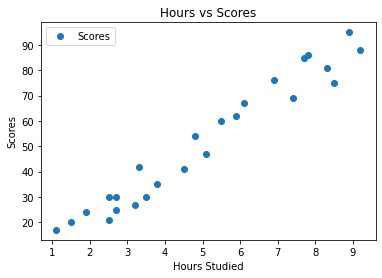

In [8]:
# Plotting the dataset of hours of study against Score
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

#### From the graph we can see that number of hours studied is directly proportional to the scored. If number of study hours increase, the scored increases too.
### Splitting the data into x and y


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [13]:
x_train

array([[1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [14]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [15]:
y_train

array([17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86, 88, 24, 62],
      dtype=int64)

In [16]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47], dtype=int64)

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [18]:
LR.fit(x_train,y_train)
print("Training complete")

Training complete


### Plotting the Regression Line

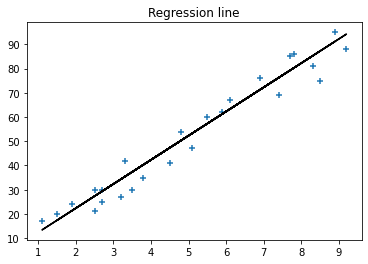

In [19]:
line = LR.coef_*x+LR.intercept_
plt.scatter(x,y,marker ='+')
plt.title('Regression line')
plt.plot(x,line,color="black")
plt.show()

### Prediction

In [20]:
y_pred_LR=LR.predict(x_test)
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [21]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47], dtype=int64)

In [22]:
y_pred_LR

array([27.35418824, 79.25993656, 40.33062532, 76.26537416, 57.29981227,
       50.3125    , 34.34150052, 87.2454363 , 53.3070624 ])

### Actual data and Predicted data

In [26]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})  
df1

,Actual,Predicted
0,30,27.354188
1,85,79.259937
2,35,40.330625
3,69,76.265374
4,60,57.299812
5,54,50.312500
6,27,34.341501
7,75,87.245436
8,47,53.307062


In [28]:
#predicting from given data
hours = 9.25
ans = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 9.25
Predicted Score = 94.73184230968408


### Predicted score for a student studying 9.25 hours is 94.29276125536514 %

In [30]:

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred_LR))

Mean Absolute Error: 5.918173514011159
